# Handwritten Digits recogniction using a CNN Model

## Frameworks and libraries used, and why ? 
For this part, we will use the following frameworks and libraries: 

- **sklearn**, for splitting datasets between training and testing sub datasets
- **numpy**, to perform operations on arrays and matrices
- **tensorflow**, for importing the MNIST dataset as well as the realization of machine learning and deep learning algorithms
- **matplotlib**, for displaying the dataset images
- **random**, for the generation of random numbers
- **opencv2**, for the processing of the dataset test images

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.datasets import mnist
import random
import matplotlib.pyplot as plt


## Dataset manipulation
Before implementing a machine learning algorithm, we will first perform some manipulations on our dataset. We are going to split it in two sub datasets. That will permit to evaluate the performance of our model: 

- A first part, randomly split, used to train our model, containing 60,000 images
- a second part, used for the validation and testing of our model, once trained, containing 10000 images
  

In [3]:
(x_train, y_train), (x_val, y_val) = mnist.load_data()

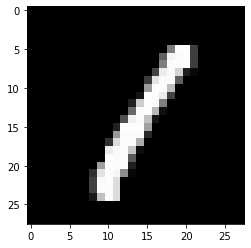

In [4]:
plt.imshow(x_train[3], cmap='gray')

We define a dictionary with the label of dataset

In [5]:
dict_digits = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Then, we normalize our data by dividing each pixel, in gray level, by 255. 
Finally, we make sure that each image has a dimension of 28x28

In [6]:
x_train = x_train/255.0
x_val = x_val/255.0

Finally, we reshape the dataset : 

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

input_shape = x_train[0].shape

print("Shape of x_train values :", x_train[0].shape)
print("Shape of x_val values :", x_val[0].shape)

Shape of x_train values : (28, 28, 1)
Shape of x_val values : (28, 28, 1)


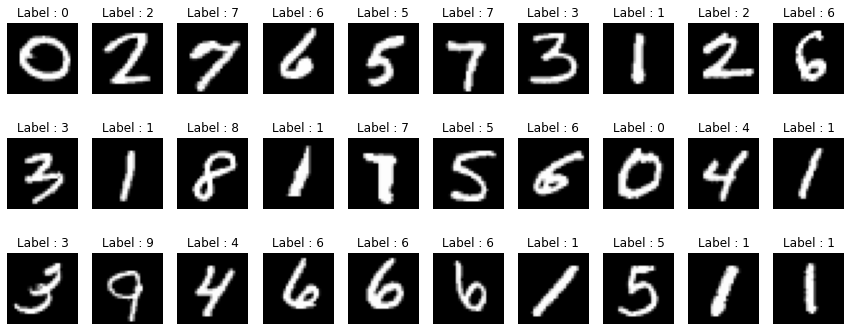

In [8]:
test_samples = random.sample(range(0, len(x_train)), 30)

plt.figure(figsize=(15, 6))
for i in test_samples:
    plt.subplot(3, 10, test_samples.index(i) + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label : {dict_digits[y_train[i]]}')
    plt.axis('off')

## CNN Model creation
### Algorithm choice 
There is a large number of models using several types of machine learning or deep learning algorithms. We have several examples of handwritten digit recognition using the SVM algorithm. 

SVM, acronym of Support Vector Machine, is a machine learning algorithm used for classification problems. It belongs to the supervised type of algorithms. Its goal, from a series of inputs, is to find a boundary between several outputs, in order to make either qualitative or quantitative predictions.

This algorithm has the virtue of being extremely simple and having many examples on the internet. We have chosen to make the task more complex, but to have more convincing results, by using a deep learning model, by implementing a CNN. 

Convolutional neural networks (CNNs) is a neural network deep learning algorithm utilized for classification and computer vision tasks. CNN uses what we call filters, which allow to realize the pattern detection. CNN do a convolution product with filters to identify patterns and features in an image. 

Convolutional neural networks have revolutionised image classification and object recognition tasks, using the principles of linear algebra, in particular the convolution product, to identify patterns and features in an image. This will be very useful, for our handwritten digits recognition.

### Algorithm implementation
For the implementation, we will use the Keras library from Tensorflow. We are going to use more particularly the Sequencial functions corresponding to the use of an ANN type model, as well as the Conv2D() functions for the realization of the convolution products, characteristic of a CNN Algorithm, as well as the MaxPool2d() functions, allowing to resample the data, Dropout(), allowing to prevent the overfitting, Flatten(), allowing to flatten the data, and Dense() allowing to define a new layer connected to the neural network 

There is our CNN model used for this case. We have found this model by trial and error :

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

2022-01-07 23:07:27.730570: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


There is on schema witch explained who it works ? 

![CNN for digit recognition - https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53](../docs/assets/img4.png)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

We compile this model : 

In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'], )

## Model training
Once this model is defined and compiled, we fit it with our training data, over 10 periods, in order to have an accuracy approaching 99%. This takes about 20 minutes.

In [17]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_val, y_val))

Epoch 1/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1395 - accuracy: 0.9590 - val_loss: 0.0449 - val_accuracy: 0.9852
Epoch 2/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0793 - accuracy: 0.9764 - val_loss: 0.0424 - val_accuracy: 0.9863
Epoch 3/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0594 - accuracy: 0.9819 - val_loss: 0.0298 - val_accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0496 - accuracy: 0.9850 - val_loss: 0.0290 - val_accuracy: 0.9915
Epoch 5/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0315 - val_accuracy: 0.9910
Epoch 6/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0387 - accuracy: 0.9876 - val_loss: 0.0306 - val_accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0335 -

## Model testing
Then, we test our model with the test sub dataset. We evaluate the model by using the evaluate function.

In [18]:
model.evaluate(x_val, y_val)

313/313 [==============================] - 2s 6ms/step - loss: 0.0301 - accuracy: 0.9922


[0.03010387346148491, 0.9922000169754028]

We notice that we have more than satisfactory results, since we have an accuracy of more than 99%

We save this model to the .h5 format.

In [19]:
model.save("models/MNIST.h5")

In [29]:
from tensorflow import keras
model = keras.models.load_model('models/MNIST.h5')

2022-01-10 00:53:32.466508: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


We will try to predict all values of the testing subdataset.

In [30]:
predictions = model.predict(x_val)

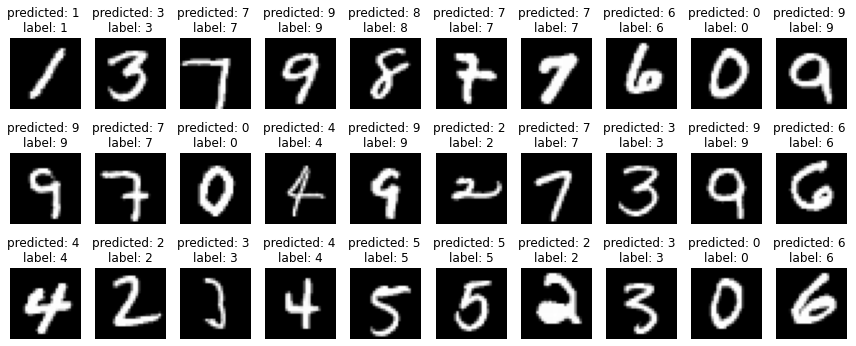

In [31]:
import random

test_samples = random.sample(range(0, len(x_val)), 30) 

plt.figure(figsize=(15, 6))
for i in test_samples:
    plt.subplot(3, 10, test_samples.index(i) + 1)  
    plt.imshow(x_val[i], cmap='gray')
    plt.title(f'predicted: {np.argmax(predictions[i])} \nlabel: {y_val[i]}')
    plt.axis('off')

Finally, we test our model by using our own digit image generated by us. We pre-process it by using some opencv function.

Character recognized : 3


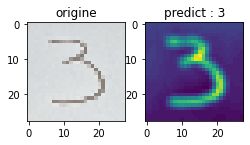

In [32]:
import cv2
from tensorflow.keras.preprocessing import image 

img = cv2.imread("images/3.png")
plt.subplot(1, 3, 1)  
plt.title("origine")
plt.imshow(img)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img, (5, 5), 0)
img = cv2.resize(img, (28,28))
img = 255 - img
# img = img/255.0


img_6 = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
img_6 = image.img_to_array(img_6)
img_6.reshape(28, 28)
img_6 = np.expand_dims(img_6, axis=0)


pred = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A' ,'B', 'C', 'D', 'E', 'F', 'G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','d','e','f','g','h','n','q','r','t']

pre = np.argmax(model.predict(img_6))
prediction = (model.predict(img_6) > 0.5).astype("int32")
# print("Character recognized :", pred[np.argmax(prediction)])
print("Character recognized :", pred[pre])


plt.subplot(1, 3, 2) 
plt.title("predict : " + pred[pre]) 
plt.imshow(img)

# plt.subplot(1, 3, 3) 
# plt.title("exemple") 
# plt.imshow(x_val[0])